In [1]:
#The imports that are used to load the sequences
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
#Method to load the data from excel and csv files
def load_data(data):
    
    #The final X values
    X = []
    
    #The final class labels 
    y = []
    
    #Class label for each family
    i = 0
    
    #Going through each folder in the specified directory
    for family in os.listdir(data):
        
        #If the folder does not start with a .
        if not family.startswith('.'):
        
            #The class label will be i
            label = i;
            
            #Increase class label for the next class
            i = i+1;
                
            #To load the excel/csv files and the sequences from them
            for filename in tqdm(os.listdir(data + '/' + family)):
                
                #If the file is in xlsx format
                if filename.endswith('x'):
                    df = pd.read_excel (data +'/'+ family + '/' + filename,header=None)
                
                #If the file is in csv format
                if filename.endswith('v'):
                    df = pd.read_csv (data +'/'+ family + '/' + filename,header=None)
                
                #Taking only the sequences column
                df2 = df[df.columns[1]]
                
                #Loading all the sequences from the excel file
                for j in range(len(df)):
                    seq = df2.loc[j]
                    
                    #Appending the sequence to X
                    X.append(np.asarray(list(seq)))
                    
                    #Appending the label to y
                    y.append(label)
    
    #Converting y to an array
    y = np.asarray(y)
    
    return X,y

#Loading data from the path
X_t,Y_t = load_data(r'Datasets')

100%|██████████| 1/1 [00:00<00:00, 12.73it/s]


In [3]:
#Method to find the length of the longest sequence
def findMaxLen(sequences):
    
    #Initial length is taken as 0
    maxLen = 0
    
    #Traverse all the sequences and if length is greater than initial length
    #Swap them and go to next sequence
    for seq in sequences:
        lengthSeq = len(seq)
        if(lengthSeq>maxLen):
            maxLen = lengthSeq
    return maxLen;

#Length of the largest sequence
lenLargestSeq = findMaxLen(X_t)

#To convert the list of characters to a list of integers
def convertStringtoInt(sequence,maxlen):

    #Dictionary with all the possible nucleotides
    dictChar = {'A':1,'C':2,'G':3,'T':4,'U':4,'R':5,'Y':6,'S':7,'W':8,'K':9,'M':10,'B':11,'D':12,'H':13,'V':14,'N':15}
    
    #New X
    X_new = []
    
    if(maxlen==0):
        #Finding the maximum length
        maxlen = findMaxLen(sequence)
    
    #Going through all the sequences
    for sequ in sequence:
        seq_new = []
        
        #Finding the integer from the dictionary and appending that to the new sequence
        for i in range(len(sequ)):
            newChar = dictChar[sequ[i]]
            seq_new.append(newChar)
        
        #If the length of new sequence is lesser than maximum length then append 0s at the end to match
        #the maximum length
        if(len(seq_new) < maxlen):
            for i in range(len(seq_new),maxlen):
                seq_new.append(0)
        
        #Append the new sequence to new X
        X_new.append(np.asarray(seq_new))
                
    return X_new;

new_X = convertStringtoInt(X_t,0)

In [4]:
#To split the training and test data
from sklearn.model_selection import train_test_split

#80% training data 20% test data
X_train, X_test, y_train, Y_test = train_test_split(new_X, Y_t, test_size=0.2)

#Converting all to array for passing to model
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(Y_test)

In [5]:
#One hot encoding the class labels
from keras.utils.np_utils import to_categorical

#For training data
y_train = np.uint8(to_categorical(y_train, num_classes = 3))

#For test data
y_test = np.uint8(to_categorical(y_test, num_classes = 3))


In [6]:
#Creating the model
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers

#Taking the input dimensions for the dense layers
input_dim = X_train.shape[1]

#Creating a sequential model
model = Sequential()

#The dense layers used in the model
#Activation model used is Relu
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(512, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))

#Final dense layer with the softmax activation function
model.add(layers.Dense(3, input_dim=input_dim, activation='softmax'))
    
#Loss function used is categorical cross entropy since multiple classes are used
#Optimizer is adam
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Fitting the model with 15 epochs and with shuffle = True
history = model.fit(X_train, y_train,epochs=20,verbose=1,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/20
64/64 [==============================] - 4s 48ms/step - loss: 0.7834 - accuracy: 0.7016 - val_loss: 0.2807 - val_accuracy: 0.8634
Epoch 2/20
64/64 [==============================] - 2s 28ms/step - loss: 0.2765 - accuracy: 0.8924 - val_loss: 0.3538 - val_accuracy: 0.8733
Epoch 3/20
64/64 [==============================] - 2s 28ms/step - loss: 0.2064 - accuracy: 0.9288 - val_loss: 0.2600 - val_accuracy: 0.9089
Epoch 4/20
64/64 [==============================] - 2s 28ms/step - loss: 0.1625 - accuracy: 0.9421 - val_loss: 0.1464 - val_accuracy: 0.9327
Epoch 5/20
64/64 [==============================] - 2s 29ms/step - loss: 0.1483 - accuracy: 0.9423 - val_loss: 0.2121 - val_accuracy: 0.9366
Epoch 6/20
64/64 [==============================] - 2s 29ms/step - loss: 0.1086 - accuracy: 0.9560 - val_loss: 0.1874 - val_accuracy: 0.9347
Epoch 7/20
64/64 [==============================] - 2s 28ms/step - loss: 0.1116 - accuracy: 0.9538 - val_loss: 0.1724 - val_accuracy: 0.9366
Epoch 8/20
64

In [7]:
#Printing the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4066560   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,165,635
Trainable params: 4,165,635
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

64/64 [==============================] - 0s 7ms/step - loss: 1.4551e-04 - accuracy: 1.0000
Training Accuracy: 1.0000
16/16 [==============================] - 0s 6ms/step - loss: 0.3419 - accuracy: 0.9505
Testing Accuracy:  0.9505


#### 10 fold Cross Validation for relu architecture 

In [9]:
from sklearn.model_selection import StratifiedKFold

In [10]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
cvscores = []
for train, test in kfold.split(new_X, Y_t):
    model = Sequential()
    model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(512, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(3, input_dim=input_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit(X_train, y_train, epochs = 20,verbose = 0)
    scores = model.evaluate(X_test, y_test, verbose = 0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

accuracy: 95.25%
accuracy: 92.67%
accuracy: 89.90%
accuracy: 95.05%
accuracy: 94.46%
accuracy: 95.25%
accuracy: 91.68%
accuracy: 94.46%
accuracy: 91.49%
accuracy: 94.65%


In [11]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

93.49% (+/- 1.81%)


In [12]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
    
print(conf_matrix)

[[160.  11.   0.]
 [ 16. 314.   0.]
 [  0.   0.   4.]]


In [13]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)

Precision:  0.9623958887116782
Recall:  0.9584149184149183
F1-score:  0.9603229425611017


In [14]:
#roc auc score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import roc_curve, auc
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')

0.9848873306783565

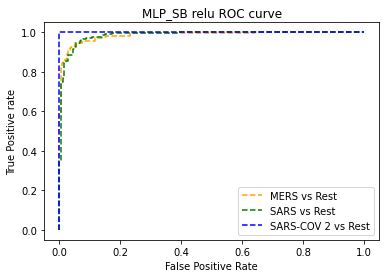

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# roc curve for classes
fpr = {}
tpr = {}
roc_auc ={}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('MLP_SB relu ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### tanh activation

In [16]:
model = Sequential()

#The dense layers used in the model
#Activation model used is tanh
model.add(layers.Dense(128, input_dim=input_dim, activation='tanh'))
model.add(layers.Dense(512, input_dim=input_dim, activation='tanh'))
model.add(layers.Dense(64, input_dim=input_dim, activation='tanh'))

model.add(layers.Dense(3, input_dim=input_dim, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Fitting the model with 15 epochs and with shuffle = True
history = model.fit(X_train, y_train,epochs=20,verbose=1,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/20
64/64 [==============================] - 2s 31ms/step - loss: 0.6142 - accuracy: 0.7200 - val_loss: 0.4420 - val_accuracy: 0.7545
Epoch 2/20
64/64 [==============================] - 2s 28ms/step - loss: 0.3614 - accuracy: 0.8369 - val_loss: 0.2989 - val_accuracy: 0.8851
Epoch 3/20
64/64 [==============================] - 2s 28ms/step - loss: 0.2792 - accuracy: 0.8800 - val_loss: 0.2212 - val_accuracy: 0.9188
Epoch 4/20
64/64 [==============================] - 2s 28ms/step - loss: 0.2496 - accuracy: 0.8861 - val_loss: 0.3179 - val_accuracy: 0.8891
Epoch 5/20
64/64 [==============================] - 2s 29ms/step - loss: 0.3587 - accuracy: 0.8654 - val_loss: 0.2836 - val_accuracy: 0.9069
Epoch 6/20
64/64 [==============================] - 2s 29ms/step - loss: 0.2690 - accuracy: 0.8944 - val_loss: 0.3012 - val_accuracy: 0.8970
Epoch 7/20
64/64 [==============================] - 2s 28ms/step - loss: 0.2857 - accuracy: 0.8899 - val_loss: 0.3162 - val_accuracy: 0.8812
Epoch 8/20
64

In [17]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

64/64 [==============================] - 0s 7ms/step - loss: 0.2032 - accuracy: 0.8915
Training Accuracy: 0.8915
16/16 [==============================] - 0s 6ms/step - loss: 0.3647 - accuracy: 0.8634
Testing Accuracy:  0.8634


In [18]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
    
print(conf_matrix)

[[121.  14.   0.]
 [ 55. 311.   0.]
 [  0.   0.   4.]]


In [19]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)

Precision:  0.9153410240841935
Recall:  0.881474358974359
F1-score:  0.8927599220106002


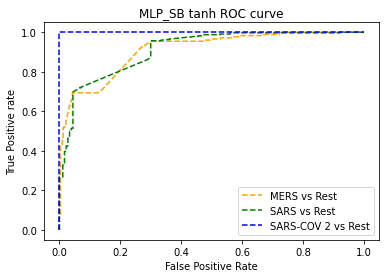

In [20]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
roc_auc ={}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('MLP_SB tanh ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### sigmoid activation

In [21]:
model = Sequential()

#The dense layers used in the model
#Activation model used is sigmoid
model.add(layers.Dense(128, input_dim=input_dim, activation='sigmoid'))
model.add(layers.Dense(512, input_dim=input_dim, activation='sigmoid'))
model.add(layers.Dense(64, input_dim=input_dim, activation='sigmoid'))
model.add(layers.Dense(3, input_dim=input_dim, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=20,verbose=1,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/20
64/64 [==============================] - 2s 31ms/step - loss: 0.6476 - accuracy: 0.7000 - val_loss: 0.4650 - val_accuracy: 0.8436
Epoch 2/20
64/64 [==============================] - 2s 29ms/step - loss: 0.4041 - accuracy: 0.8693 - val_loss: 0.2688 - val_accuracy: 0.9188
Epoch 3/20
64/64 [==============================] - 2s 29ms/step - loss: 0.2832 - accuracy: 0.8993 - val_loss: 0.3554 - val_accuracy: 0.8653
Epoch 4/20
64/64 [==============================] - 2s 28ms/step - loss: 0.2634 - accuracy: 0.9135 - val_loss: 0.2455 - val_accuracy: 0.9129
Epoch 5/20
64/64 [==============================] - 2s 28ms/step - loss: 0.1998 - accuracy: 0.9374 - val_loss: 0.2049 - val_accuracy: 0.9307
Epoch 6/20
64/64 [==============================] - 2s 28ms/step - loss: 0.1765 - accuracy: 0.9439 - val_loss: 0.2163 - val_accuracy: 0.9208
Epoch 7/20
64/64 [==============================] - 2s 28ms/step - loss: 0.1489 - accuracy: 0.9455 - val_loss: 0.2141 - val_accuracy: 0.9287
Epoch 8/20
64

In [22]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

64/64 [==============================] - 0s 7ms/step - loss: 0.0530 - accuracy: 0.9861
Training Accuracy: 0.9861
16/16 [==============================] - 0s 7ms/step - loss: 0.1767 - accuracy: 0.9485
Testing Accuracy:  0.9485


In [23]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
    
print(conf_matrix)

[[162.  12.   0.]
 [ 14. 313.   0.]
 [  0.   0.   4.]]


In [24]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)

Precision:  0.9627403423670428
Recall:  0.9611771561771562
F1-score:  0.961945661700263


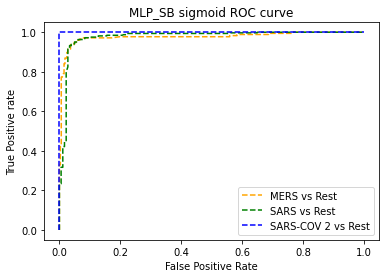

In [25]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
roc_auc ={}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('MLP_SB sigmoid ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### elu activation

In [26]:
model = Sequential()

model.add(layers.Dense(128, input_dim=input_dim, activation='elu'))
model.add(layers.Dense(512, input_dim=input_dim, activation='elu'))
model.add(layers.Dense(64, input_dim=input_dim, activation='elu'))
model.add(layers.Dense(3, input_dim=input_dim, activation='softmax'))
    
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=20,verbose=1,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/20
64/64 [==============================] - 2s 32ms/step - loss: 0.9288 - accuracy: 0.6898 - val_loss: 0.5683 - val_accuracy: 0.8356
Epoch 2/20
64/64 [==============================] - 2s 29ms/step - loss: 0.3557 - accuracy: 0.8661 - val_loss: 0.3428 - val_accuracy: 0.8673
Epoch 3/20
64/64 [==============================] - 2s 29ms/step - loss: 0.3480 - accuracy: 0.9023 - val_loss: 0.2233 - val_accuracy: 0.9149
Epoch 4/20
64/64 [==============================] - 2s 30ms/step - loss: 0.1718 - accuracy: 0.9286 - val_loss: 0.2215 - val_accuracy: 0.9109
Epoch 5/20
64/64 [==============================] - 2s 30ms/step - loss: 0.1209 - accuracy: 0.9589 - val_loss: 0.2670 - val_accuracy: 0.9208
Epoch 6/20
64/64 [==============================] - 2s 30ms/step - loss: 0.1440 - accuracy: 0.9410 - val_loss: 0.2008 - val_accuracy: 0.9347
Epoch 7/20
64/64 [==============================] - 2s 30ms/step - loss: 0.1089 - accuracy: 0.9599 - val_loss: 0.2113 - val_accuracy: 0.9406
Epoch 8/20
64

In [27]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

64/64 [==============================] - 1s 8ms/step - loss: 0.0151 - accuracy: 0.9931
Training Accuracy: 0.9931
16/16 [==============================] - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9485
Testing Accuracy:  0.9485


In [28]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
    
print(conf_matrix)

[[158.   8.   0.]
 [ 18. 317.   0.]
 [  0.   0.   4.]]


In [29]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)

Precision:  0.9660252952106935
Recall:  0.9577039627039627
F1-score:  0.9615275562643983


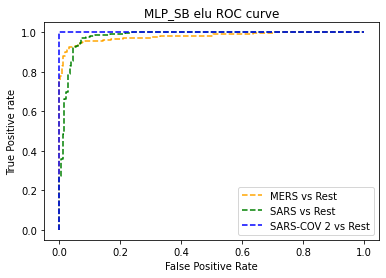

In [30]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
roc_auc ={}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('MLP_SB elu ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### selu Activation

In [31]:
model = Sequential()

model.add(layers.Dense(128, input_dim=input_dim, activation='selu'))
model.add(layers.Dense(512, input_dim=input_dim, activation='selu'))
model.add(layers.Dense(64, input_dim=input_dim, activation='selu'))
model.add(layers.Dense(3, input_dim=input_dim, activation='softmax'))
    
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=20,verbose=1,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/20
64/64 [==============================] - 2s 31ms/step - loss: 1.3427 - accuracy: 0.7129 - val_loss: 0.8267 - val_accuracy: 0.6119
Epoch 2/20
64/64 [==============================] - 2s 29ms/step - loss: 0.4999 - accuracy: 0.7858 - val_loss: 0.4691 - val_accuracy: 0.8792
Epoch 3/20
64/64 [==============================] - 2s 29ms/step - loss: 0.3062 - accuracy: 0.9044 - val_loss: 0.2655 - val_accuracy: 0.9069
Epoch 4/20
64/64 [==============================] - 2s 29ms/step - loss: 0.1824 - accuracy: 0.9435 - val_loss: 0.4465 - val_accuracy: 0.8317
Epoch 5/20
64/64 [==============================] - 2s 29ms/step - loss: 0.2310 - accuracy: 0.9165 - val_loss: 0.3360 - val_accuracy: 0.9188
Epoch 6/20
64/64 [==============================] - 2s 29ms/step - loss: 0.1245 - accuracy: 0.9494 - val_loss: 0.2295 - val_accuracy: 0.9287
Epoch 7/20
64/64 [==============================] - 2s 29ms/step - loss: 0.0775 - accuracy: 0.9698 - val_loss: 0.2375 - val_accuracy: 0.9366
Epoch 8/20
64

In [32]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

64/64 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 0.9985
Training Accuracy: 0.9985
16/16 [==============================] - 0s 7ms/step - loss: 0.2878 - accuracy: 0.9485
Testing Accuracy:  0.9485


In [33]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
    
print(conf_matrix)

[[156.   6.   0.]
 [ 20. 319.   0.]
 [  0.   0.   4.]]


In [34]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)

Precision:  0.9679886376051567
Recall:  0.955967365967366
F1-score:  0.961306765523633


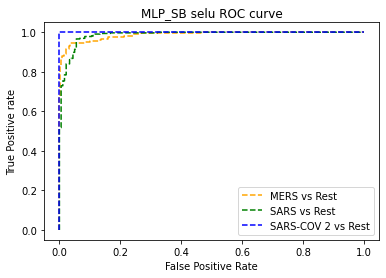

In [35]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
roc_auc ={}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('MLP_SB selu ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()